# Powergrid network clustering example

The europen powergrid network can be clustered to highlight some known modules, see https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0032210

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pygenstability import run, plotting

In [25]:
edges    = np.genfromtxt('UCTE_edges.txt')
location = np.genfromtxt('UCTE_nodes.txt')
posx = location[:,1]
posy = location[:,2]
pos  = {}

edges = np.array(edges,dtype=np.int32)
G = nx.Graph() #empty graph
G.add_edges_from(edges) #add edges

# resetting label ids
G = nx.convert_node_labels_to_integers(G, label_attribute = 'old_label' )

# updating label names and applying positions as attribute
for i in G.nodes():
    pos[i] = np.array([posx[G.nodes[i]['old_label']-1], posy[G.nodes[i]['old_label']-1]])
    G.nodes[i]['pos'] = pos[i].reshape(-1)

adjacency = nx.to_scipy_sparse_array(G)
print(len(G), 'nodes ,', len(G.edges), 'edges')


2783 nodes , 3762 edges


In [22]:
all_results = run(adjacency, min_scale=0, max_scale = 2.0, 
                  n_scale = 100, constructor='linearized')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 49.19it/s]


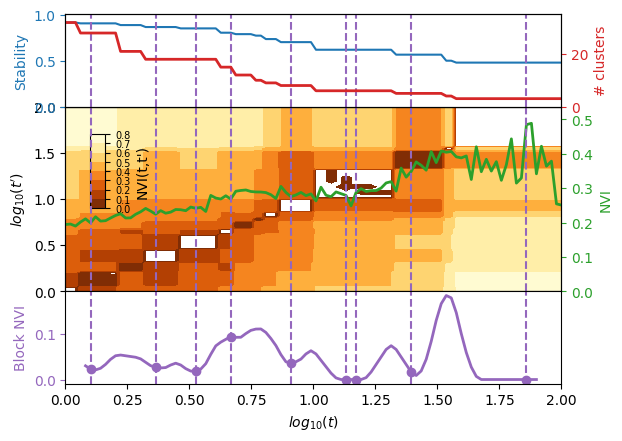

In [23]:
_ = plotting.plot_scan(all_results, use_plotly=False)

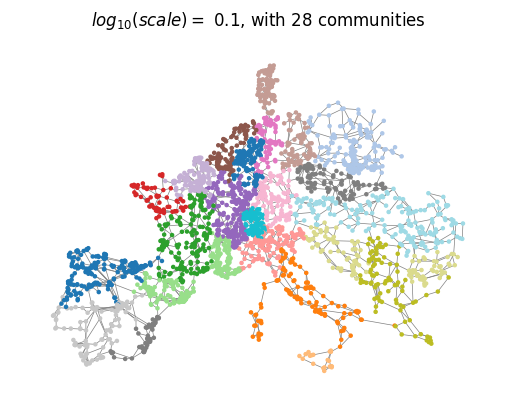

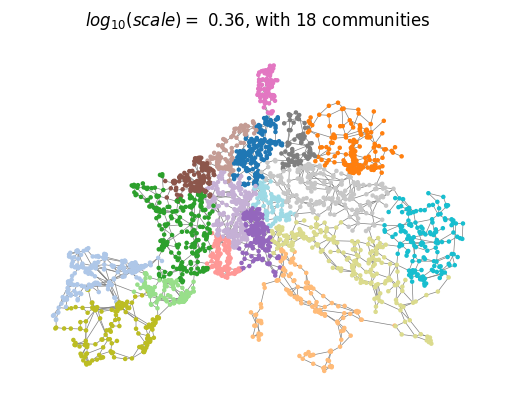

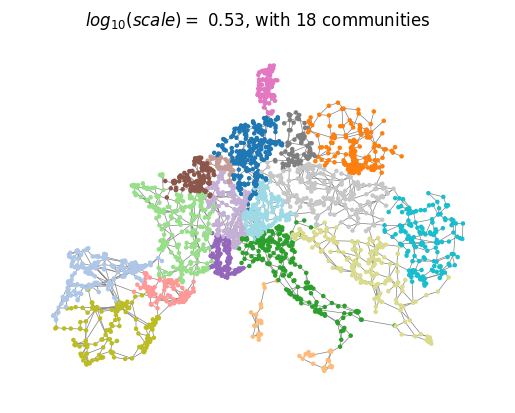

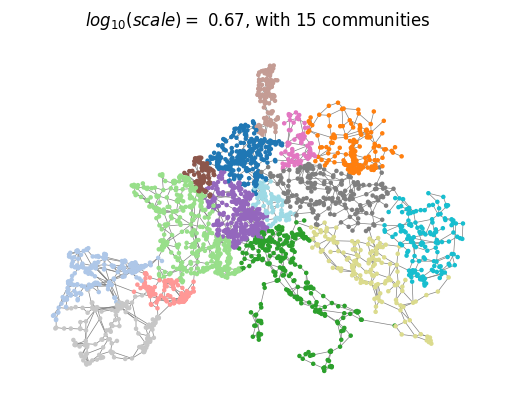

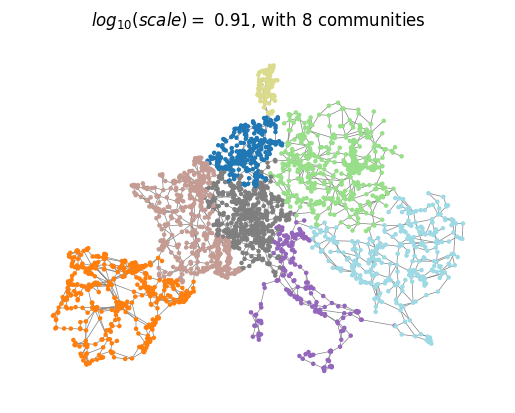

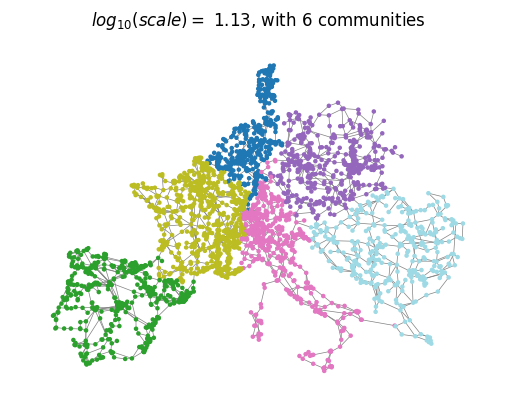

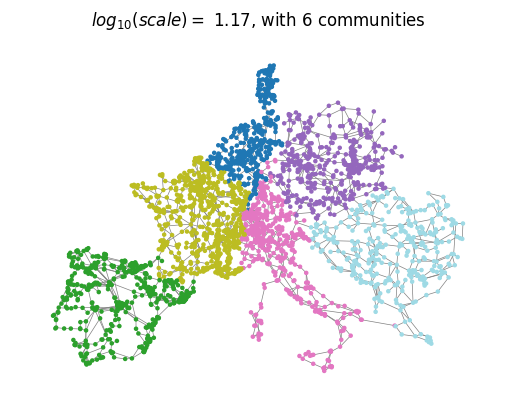

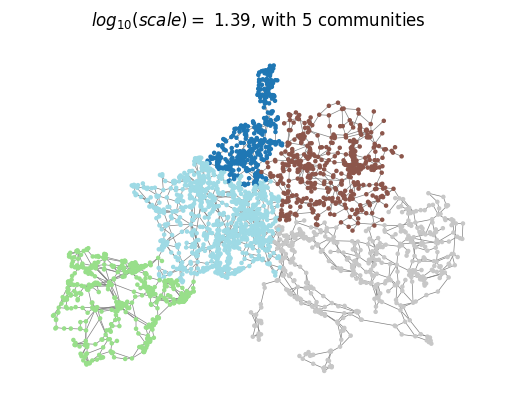

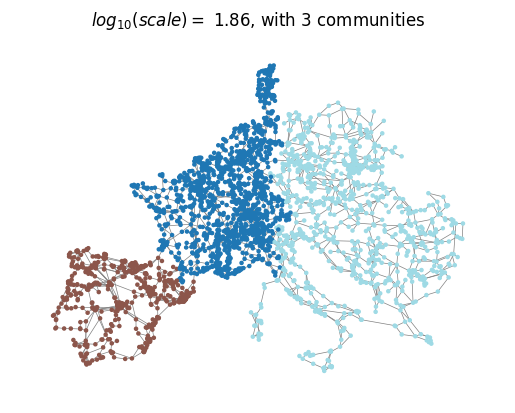

In [24]:
for optimal_scale_id in all_results["selected_partitions"]:
    plt.figure()
    plotting.plot_single_partition(G, all_results, optimal_scale_id, node_size=5)